In [75]:
!pip install mne

In [77]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import mne

from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
import seaborn as sns
sns.set_style('darkgrid')

from scipy import stats
from mne.stats import permutation_cluster_test
import warnings
warnings.filterwarnings('ignore')


In [79]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)

In [194]:
subjects=['S101','S104', 'S105']
sub=subjects[0]

In [196]:
sub

'S101'

## Загрузка данных из 4 скрипта


In [199]:
eeg_all = mne.read_epochs(sub+'/5_Files_for_model/epochs_eeg_2-epo.fif')

Reading C:\Users\khani\skolteh\WEEK1\WEEK1\S101\5_Files_for_model\epochs_eeg_2-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2000.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
202 matching events found
No baseline correction applied
0 projection items activated


## Кластерный анализ

In [202]:
epochs_eeg=eeg_all.copy().resample(1000) #ресемплируем до 1000 Гц
epochs_eeg_init=eeg_all.copy().resample(1000)

Функция для кластерного анализа

In [205]:
def cluster_plot(times,condition1,condition2,title, n_permutations=1000):

  threshold = 6.0 #определяет, насколько значительным должно быть отличие между условиями (эксперим. наборы), чтобы его считать кластером
  ch_signif_list=[] #список стат значимых кластеров
  #Т - статистики для каждого временного интервала, Н0 - распределение при нулевой гипотезе
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test([condition1, condition2], n_permutations=n_permutations,
                              threshold=threshold, tail=1, n_jobs=None,
                              out_type='mask')

  fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 4))

  ax.plot(times, condition1.mean(axis=0) - condition2.mean(axis=0),
          label="Contrast (Event 1 - Event 2)")

  ax.legend()

  for i_c, c in enumerate(clusters):
      c = c[0]
      if cluster_p_values[i_c] <= 0.05:
          ch_signif_list.append( [c.start,c.stop] )
          h = ax2.axvspan(times[c.start], times[c.stop - 1],
                          color='r', alpha=0.3) #если кластер значимый, то выделяем его на графике красным

      else:
          ax2.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3),
                      alpha=0.3) #у незначимых серый цвет


  hf = plt.plot(times, T_obs, 'g') #график со значениями статистик
  ax2.set_xlabel("time (ms)")
  ax2.set_ylabel("f-values")
  plt.suptitle(title)

  return ch_signif_list #то есть возвращается список пар с временными точками значимых кластеров

In [94]:
epochs_eeg._data.shape

(208, 11, 9000)

Кластерный тест, в отличие от обычных статистических тестов, находит последовательные стат значимые различия. 

Точки, котоыре показывают похожие различия, объединяются в кластеры.

Сначала для каждого элемента проводится обычный тест, потом по его результатам похожие элементы объединяются в кластеры.

In [207]:
%matplotlib inline

stat_fun(H1): min=1.8542310904059562e-10 max=28.02425272443219
Running initial clustering …
Found 19 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

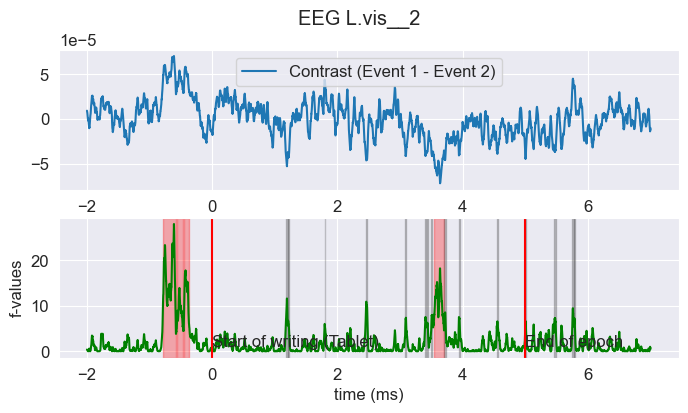

stat_fun(H1): min=3.3008244157247803e-09 max=11.699321928281913
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

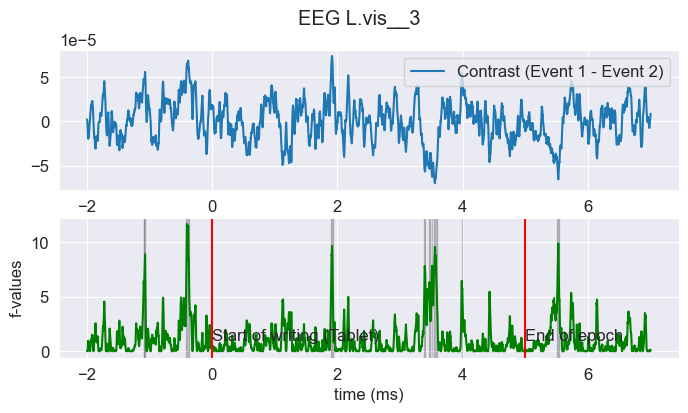

stat_fun(H1): min=2.0214221597373105e-08 max=12.76204605851949
Running initial clustering …
Found 19 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

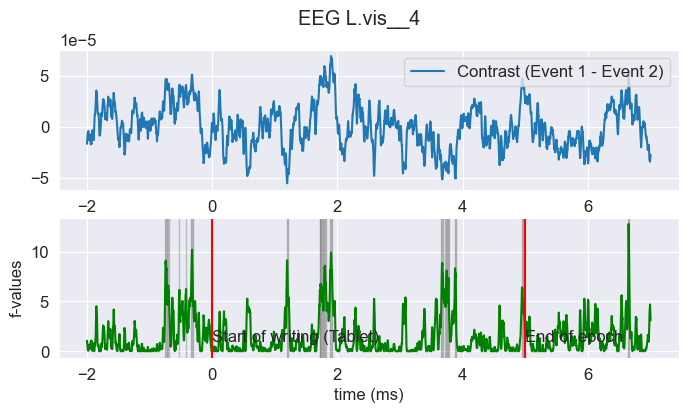

stat_fun(H1): min=1.1223043137046067e-09 max=25.42177856302973
Running initial clustering …
Found 22 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

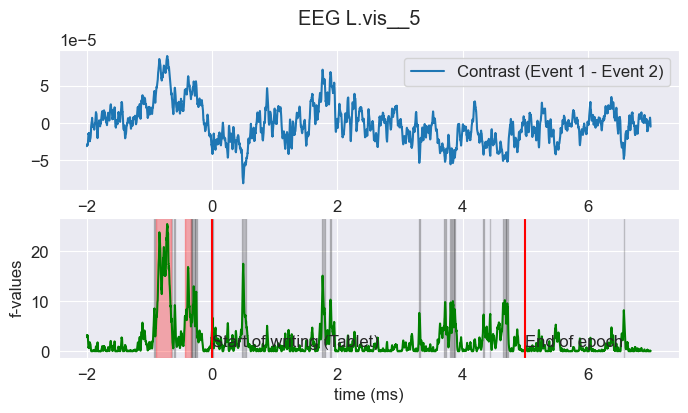

stat_fun(H1): min=4.9220275305381455e-08 max=35.72797584045534
Running initial clustering …
Found 12 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

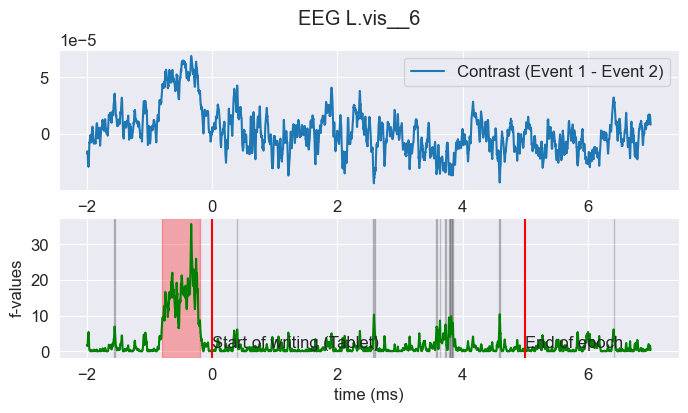

stat_fun(H1): min=1.9945458358462563e-09 max=31.615239606574466
Running initial clustering …
Found 28 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

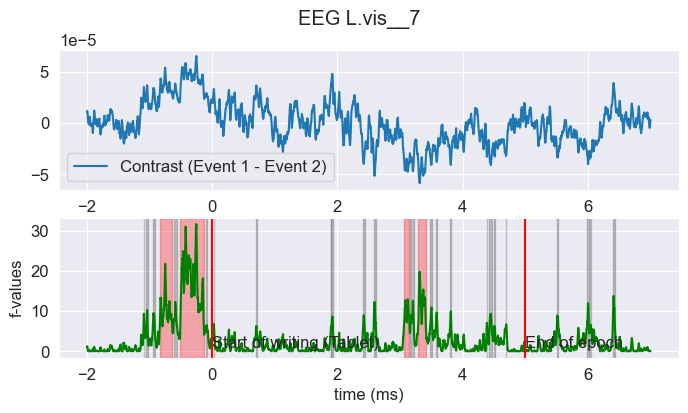

stat_fun(H1): min=1.835619269561839e-07 max=32.381406862074996
Running initial clustering …
Found 37 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

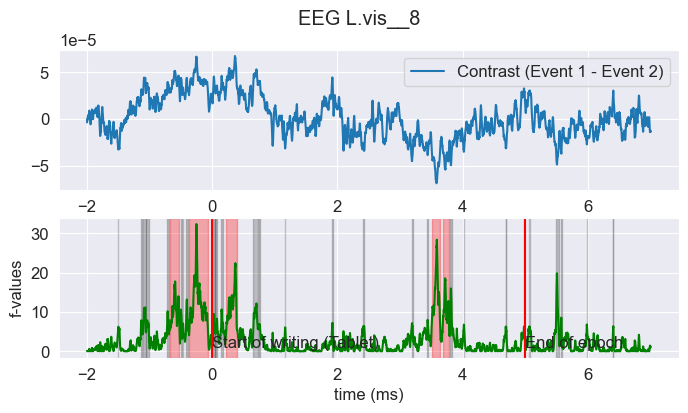

stat_fun(H1): min=8.641817152603538e-08 max=42.79561357477493
Running initial clustering …
Found 20 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

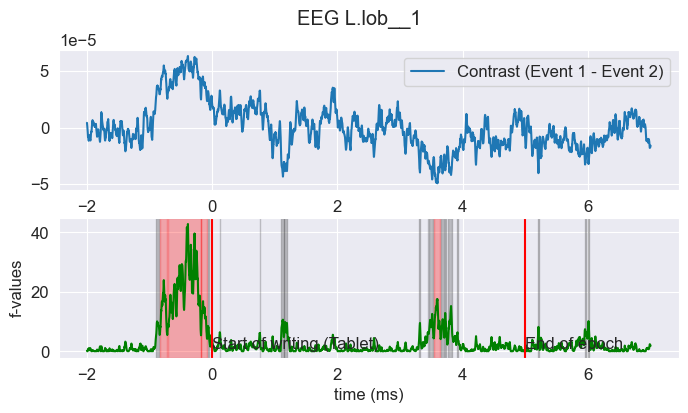

stat_fun(H1): min=7.186503067879427e-09 max=30.56488252791737
Running initial clustering …
Found 43 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

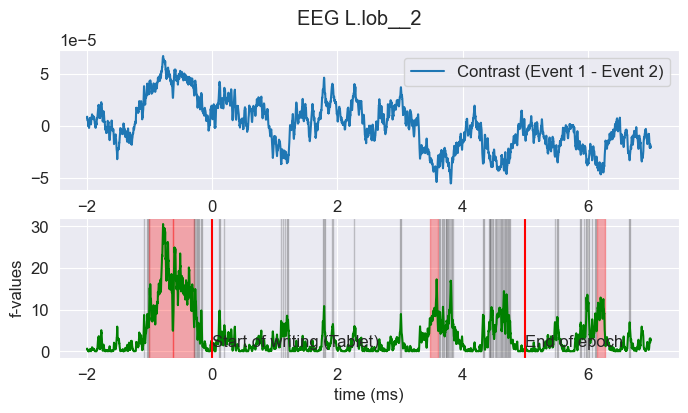

stat_fun(H1): min=5.7020597456563847e-08 max=36.19076540100069
Running initial clustering …
Found 29 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

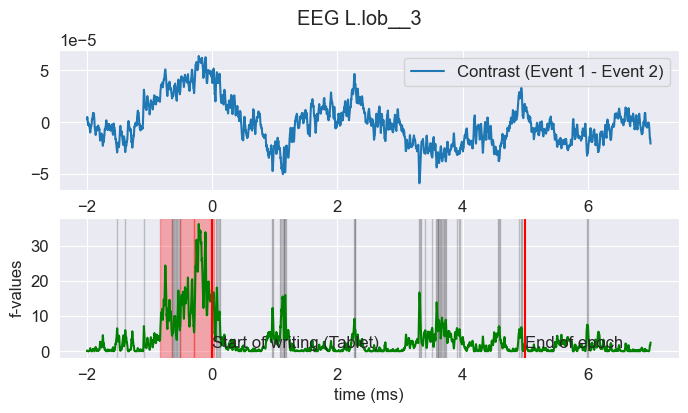

stat_fun(H1): min=1.0019812301915632e-08 max=51.13281677282271
Running initial clustering …
Found 37 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

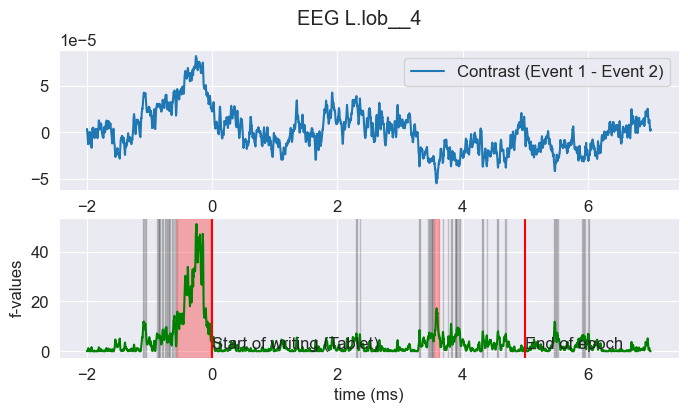

stat_fun(H1): min=9.798982547845817e-08 max=24.996734634124923
Running initial clustering …
Found 34 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

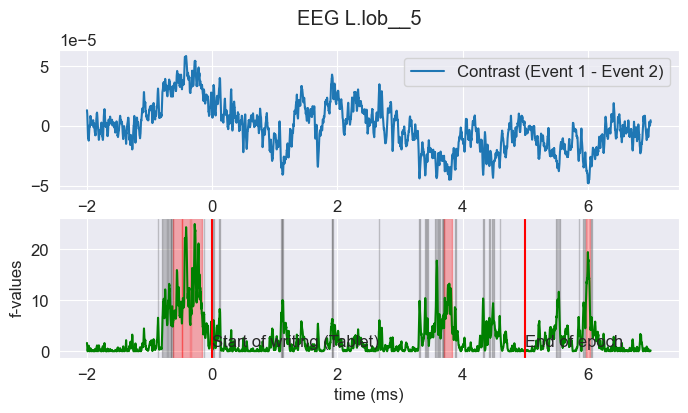

stat_fun(H1): min=6.633668834237292e-07 max=25.90102912578835
Running initial clustering …
Found 41 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

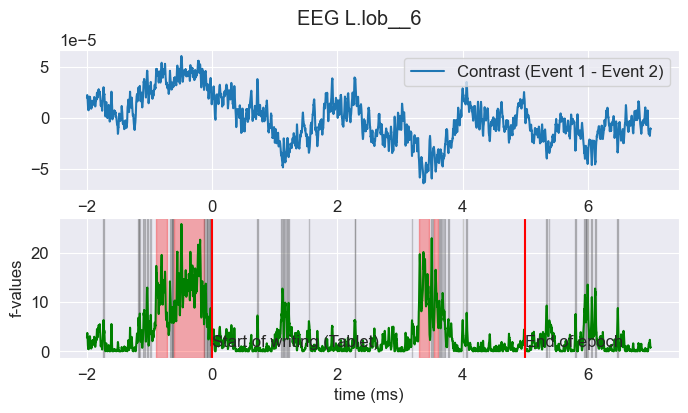

stat_fun(H1): min=3.405265365018386e-07 max=33.33890046749201
Running initial clustering …
Found 47 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

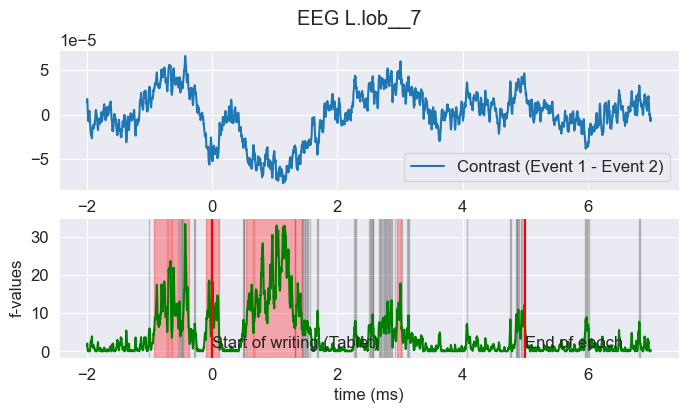

stat_fun(H1): min=5.7718901481285385e-08 max=34.316446520602305
Running initial clustering …
Found 44 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

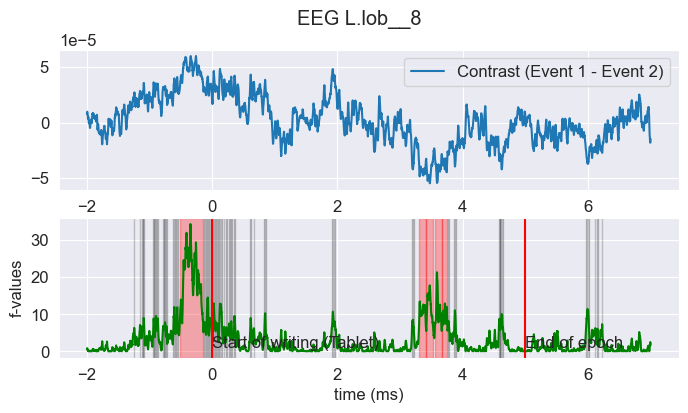

stat_fun(H1): min=8.606818464559064e-08 max=38.44034110963622
Running initial clustering …
Found 30 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

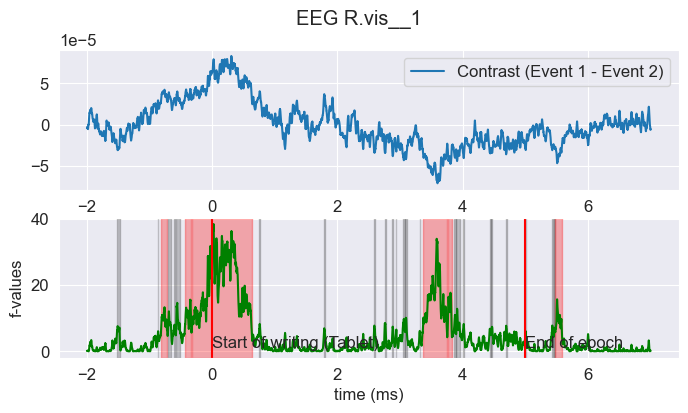

stat_fun(H1): min=2.165724929363857e-07 max=32.73925679964407
Running initial clustering …
Found 61 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

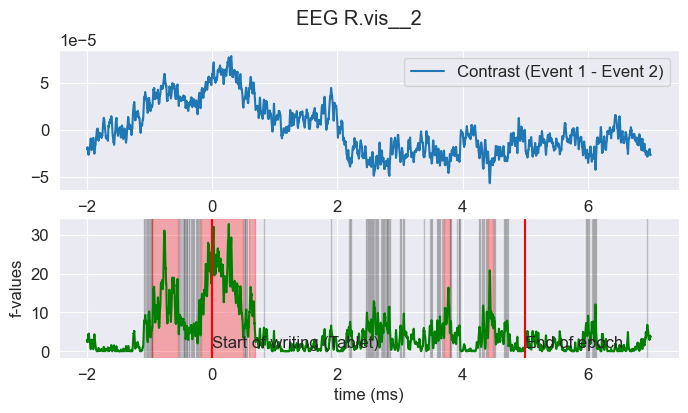

stat_fun(H1): min=1.8510007935002533e-07 max=25.807225856335908
Running initial clustering …
Found 41 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

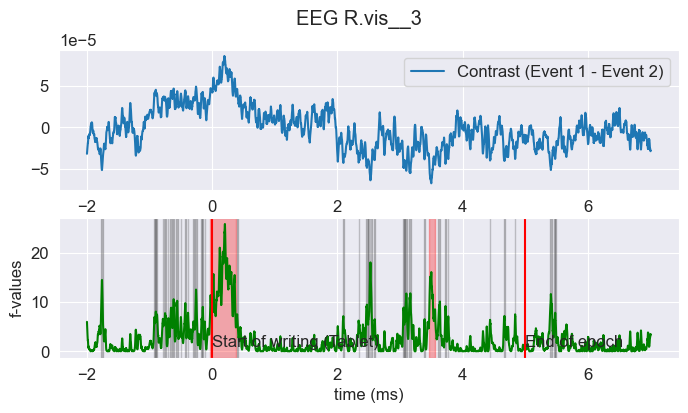

stat_fun(H1): min=8.244916186807277e-09 max=38.09698072147795
Running initial clustering …
Found 42 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

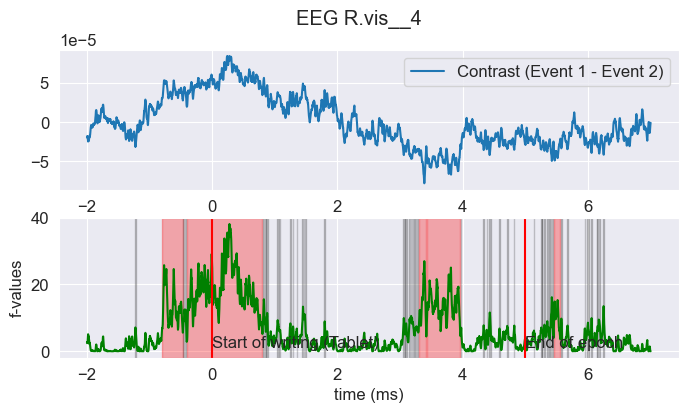

stat_fun(H1): min=1.0355744662673747e-07 max=34.18005556163697
Running initial clustering …
Found 73 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

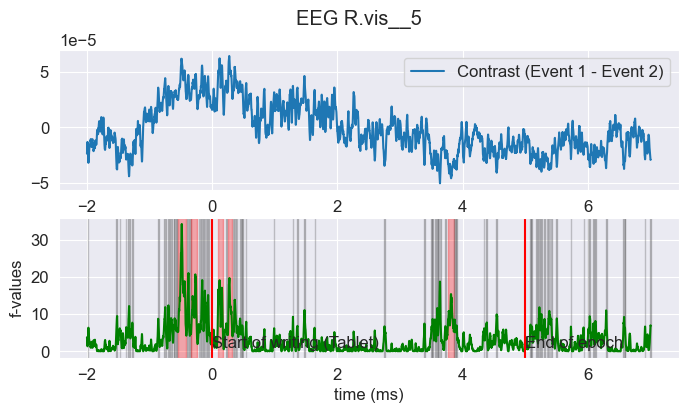

stat_fun(H1): min=5.641166677606869e-07 max=45.57727908629844
Running initial clustering …
Found 42 clusters


  0%|          | Permuting : 0/499 [00:00<?,       ?it/s]

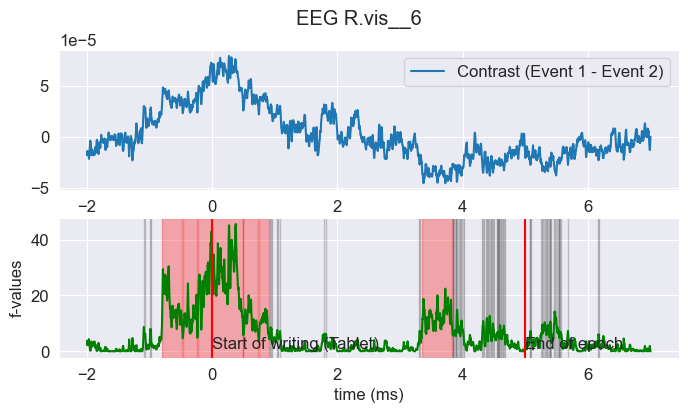

In [224]:
sfreq = epochs_eeg.info['sfreq']
info = mne.create_info(
    ch_names=['eeg1'],
    ch_types=['eeg'],
    sfreq=sfreq
)

ch_signif_list_dict={} #здесь будут лежать резы для каждого канала

for i in range(len(epochs_eeg.ch_names)):
  ch_i=i

  custom_epochs=epochs_eeg

  interval=epochs_eeg_init._data[:,ch_i,:].flatten().shape[0]
  flatten_data=epochs_eeg_init._data[:,ch_i,:].flatten() #преобразуем полученный двумерный массив в 1мерный

    # Создаем случайные эпохи
  epoch_length=custom_epochs._data.shape[-1] # (211, 21, 9000) берем кол-во временных точек
    
  random_seq_list=[]
  for k in range(len(custom_epochs)):
    rand_v=np.random.randint(interval-epoch_length)
    random_seq=flatten_data[rand_v:rand_v+epoch_length] #с рандомного места начинаем "эпоху"
    random_seq_list.append(random_seq)

  random_array=np.array(random_seq_list) #преобразуем список в numpy массив и отправляем в кластерный анализ
  ch_signif_list=cluster_plot(custom_epochs.times, custom_epochs._data[:,i,:], random_array, epochs_eeg.ch_names[i], n_permutations=500 )

  ch_signif_list_dict[epochs_eeg.ch_names[i]]=ch_signif_list

  plt.axvline(x=0, color='red')
  plt.text(x=0, y=1,s='Start of writing (Tablet)')

  #plt.axvline(x=.5, color='red')
  #plt.text(x=.5, y=1,s='digit') #вторая красная лииня - появление цифры

  plt.axvline(x=5,color='red') #конец эпохи
  plt.text(x=5,y=1,s='End of epoch')


  plt.show()

In [226]:
#30 colors
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown', 'cyan', 
          'magenta', 'lime', 'teal', 'navy', 'maroon', 'olive', 'gold', 'silver', 'coral', 'orchid',
          'turquoise', 'salmon', 'aqua', 'darkgreen', 'darkslateblue', 'deeppink', 'fuchsia', 'tomato', 'slateblue', 'sienna']

## Итоговый график со значимыми участками


In [241]:
l_border_ms, r_border_ms= -2, 6 
l_ch_ind, r_ch_ind= 15,21 #здесь меняем в зависимости от нужных электродов

In [231]:
len(epochs_eeg.ch_names)

21

EEG R.vis__1 1183 1284
EEG R.vis__1 1562 1668
EEG R.vis__1 1671 2631
EEG R.vis__1 5362 5747
EEG R.vis__1 5758 5824
EEG R.vis__1 7480 7581
EEG R.vis__2 1042 1460
EEG R.vis__2 1818 2487
EEG R.vis__2 2580 2680
EEG R.vis__2 5706 5792
EEG R.vis__2 6407 6490
EEG R.vis__3 1962 2373
EEG R.vis__3 5463 5564
EEG R.vis__4 1195 1529
EEG R.vis__4 1604 2798
EEG R.vis__4 5295 5415
EEG R.vis__4 5422 5958
EEG R.vis__4 7453 7546
EEG R.vis__5 1460 1581
EEG R.vis__5 1667 1753
EEG R.vis__5 2087 2170
EEG R.vis__5 2254 2316
EEG R.vis__5 5761 5855
EEG R.vis__6 1192 1526
EEG R.vis__6 1537 1761
EEG R.vis__6 1767 2495
EEG R.vis__6 2499 2735
EEG R.vis__6 2752 2900
EEG R.vis__6 5347 5837


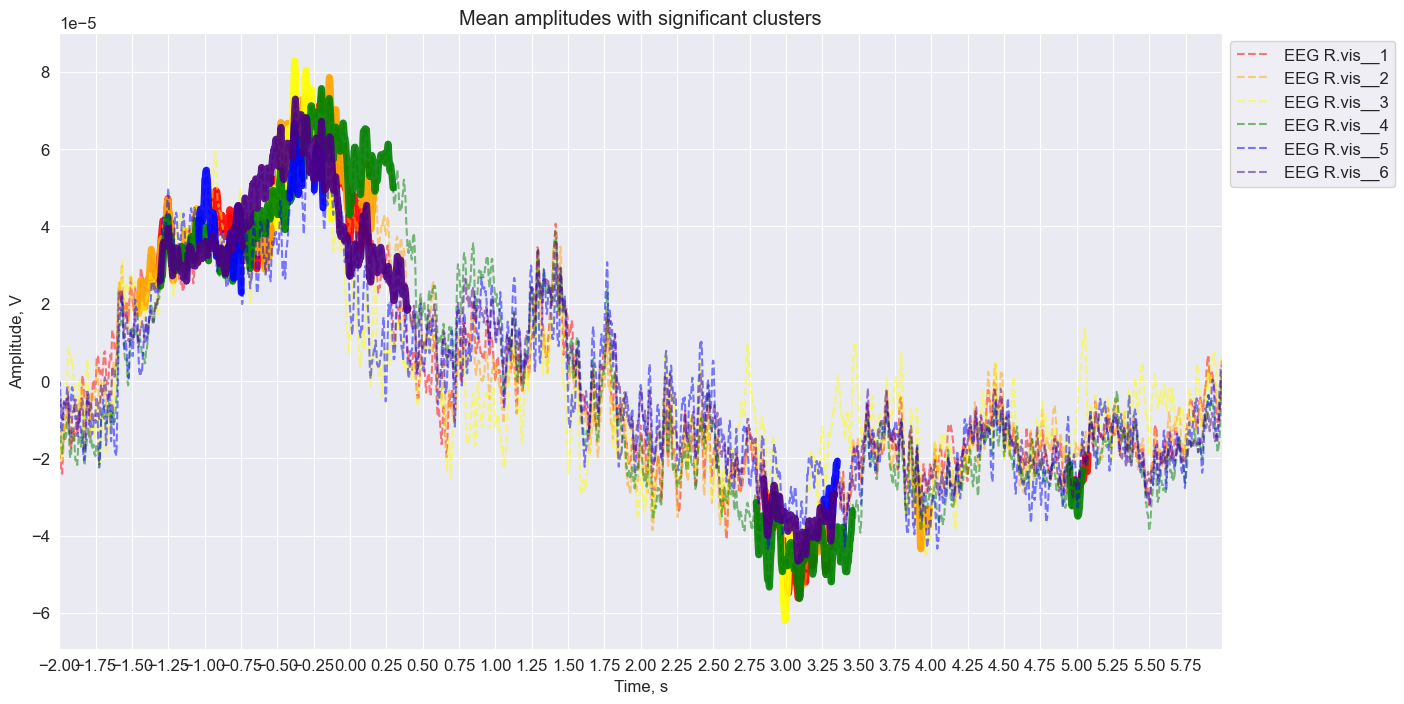

In [243]:
plt.rcParams.update({'font.size': 12})

fig=plt.figure(figsize=(15,8))



for i in range(l_ch_ind, r_ch_ind):
    ch_i=i
    ch_nm=epochs_eeg.ch_names[ch_i]

    times_= (custom_epochs.times-0.5) 
    mean_=np.mean(custom_epochs._data[:,i,:],0) 

    l_border_ind, r_border_ind= times_.tolist().index(l_border_ms), times_.tolist().index(r_border_ms)

    for k in range(len(ch_signif_list_dict[ch_nm])):
            try:
                s_=np.array(ch_signif_list_dict[ch_nm])[k][0]
                e_=np.array(ch_signif_list_dict[ch_nm])[k][1]
                #проверяем находится ли кластер в заданных границах
                if times_[s_:e_][-1]>l_border_ms and times_[s_:e_][-1]<r_border_ms :
                    plt.plot(times_[s_:e_] ,mean_[s_:e_], color=colors[i- l_ch_ind], linewidth=5, alpha=0.9)
                    print(ch_nm,s_,e_)
            except:
                print(ch_nm, 'none')
    #средняя кривая для текущего канала с заданными границами
    plt.plot(times_[l_border_ind:r_border_ind]  , mean_[l_border_ind:r_border_ind] , '--', alpha=0.5, color=colors[i-l_ch_ind], label=ch_nm )


plt.xlim(l_border_ms,r_border_ms)
plt.xticks( np.arange(l_border_ms,r_border_ms,0.25) )

ax=plt.gca()
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.ylabel('Amplitude, V')
plt.xlabel('Time, s')
plt.title('Mean amplitudes with significant clusters')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.grid(True)
plt.show()


For the handwriting task, the intervals were: (M1) 
-500 -- 0 ms with respect to the onset of digit presentation,

 (M2) 0 -- 500 ms, which was th 
interval preceding handwriting onset

, (M3) 500 -- 3,000 ms, which corresponded to t e
handwritin

g, (M4) 3,000 -- 4,500 ms, which was the interval when the handwriting was
completed.

In [ ]:
pca=TSNE(2)
shifted_maxtrix_pca=pca.fit_transform(shifted_maxtrix)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


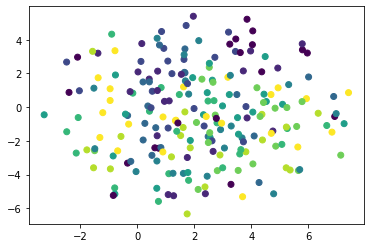

In [ ]:
plt.scatter(shifted_maxtrix_pca[:,0],shifted_maxtrix_pca[:,1], c=digits_trials_new)

In [ ]:
for i in range(10):
  #fig, subplots= plt.subplots(1,2, figsize=(15,10))




  inds=np.where(digits_trials==i)[0]
  plt.plot( epochs_eeg_data[inds,0,:].T , alpha=0.5)
  plt.show()
  plt.plot( norm_data[inds,0,:].T , alpha=0.5)
  plt.show()

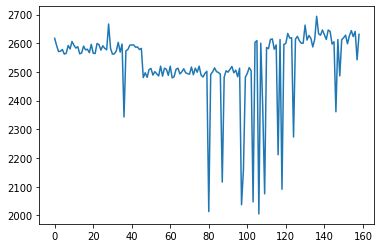

In [ ]:
plt.plot(ind_ok_list)

In [ ]:
epochs_handwriting_data_sq

array([[[3.42634723e-05, 3.42388934e-05, 3.43506781e-05, ...,
         2.27462624e-05, 2.37673579e-05, 2.39103756e-05],
        [1.07810975e-03, 1.07873451e-03, 1.07819875e-03, ...,
         1.16576624e-03, 1.16422907e-03, 1.16399000e-03]],

       [[4.65056523e-05, 4.80751163e-06, 5.06540841e-04, ...,
         3.64583746e-05, 5.50088081e-05, 4.71443801e-05],
        [1.17650328e-03, 1.17466328e-03, 1.17786307e-03, ...,
         1.15541084e-03, 1.15363850e-03, 1.15309878e-03]],

       [[3.27690217e-05, 3.29774571e-05, 3.27835794e-05, ...,
         2.11798027e-05, 1.94128397e-05, 2.34597302e-05],
        [1.19313841e-03, 1.19265204e-03, 1.19366959e-03, ...,
         1.22497212e-03, 1.22498341e-03, 1.22567513e-03]],

       ...,

       [[3.37166986e-05, 3.45375647e-05, 3.42136057e-05, ...,
         9.19261830e-05, 1.02898264e-04, 9.71237810e-05],
        [1.27124909e-03, 1.27153631e-03, 1.27237462e-03, ...,
         1.26751095e-03, 1.26940280e-03, 1.27011001e-03]],

       [[3.01953790

In [ ]:
epochs_eeg_data=epochs_eeg._data

In [ ]:
epochs_eeg_data.shape

(216, 12, 9000)

In [ ]:
np.mean(epochs_eeg_data, 0)
np.std(epochs_eeg_data, 0)

In [ ]:
norm_data= (epochs_eeg_data[:,:,:] -  np.mean(epochs_eeg_data, 0))/np.std(epochs_eeg_data, 0)

In [ ]:
norm_data.shape

(216, 12, 9000)

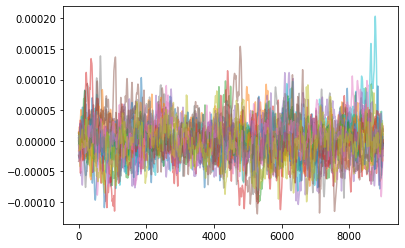

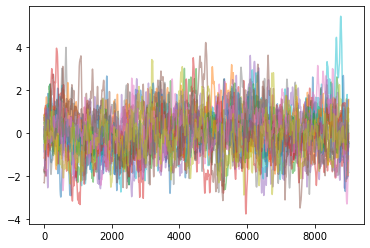

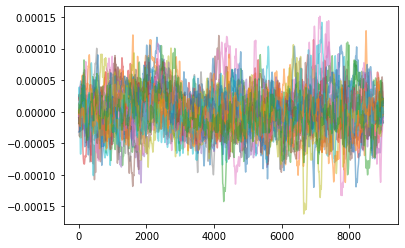

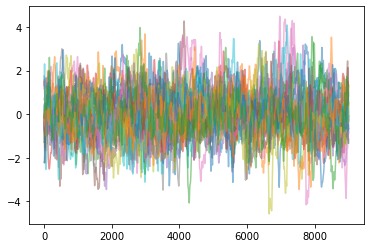

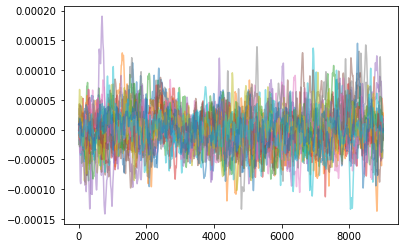

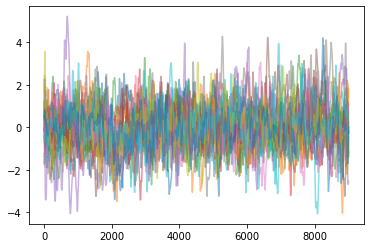

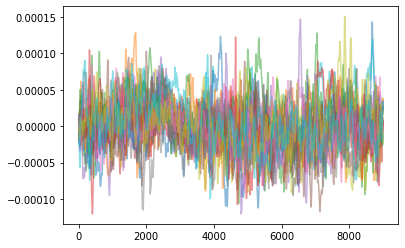

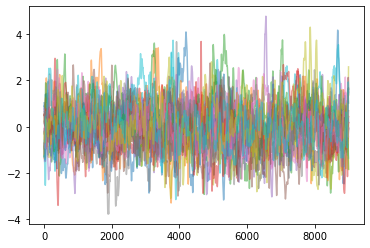

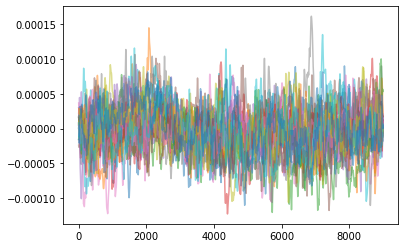

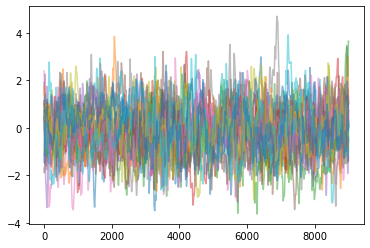

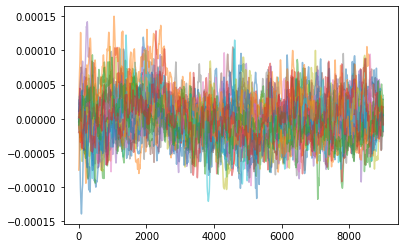

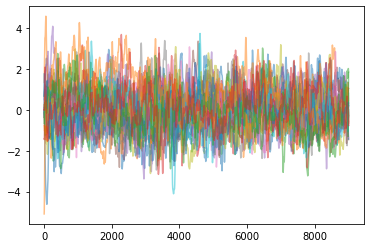

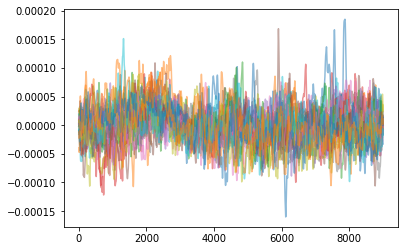

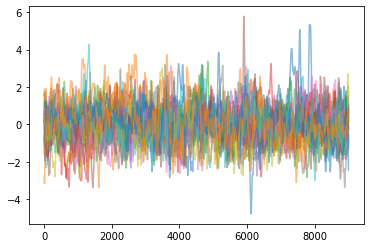

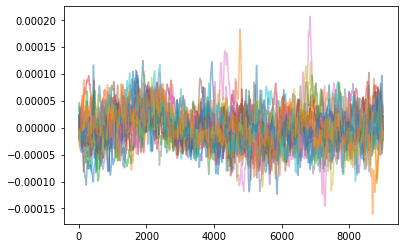

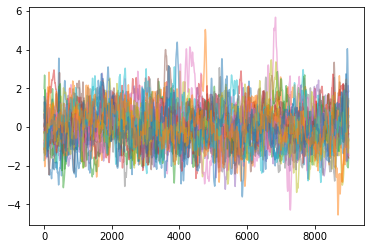

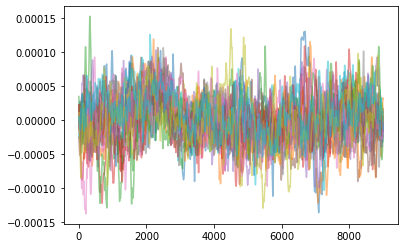

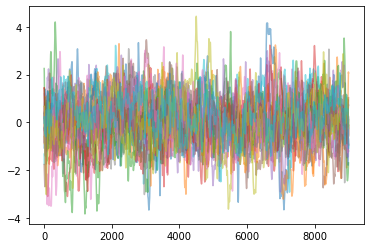

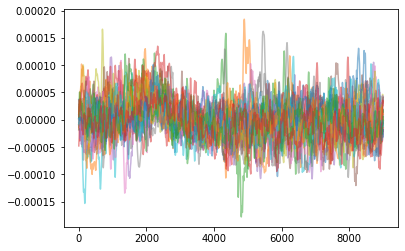

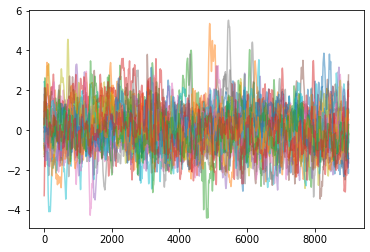

In [ ]:
for i in range(10):
  #fig, subplots= plt.subplots(1,2, figsize=(15,10))




  inds=np.where(digits_trials==i)[0]
  plt.plot( epochs_eeg_data[inds,0,:].T , alpha=0.5)
  plt.show()
  plt.plot( norm_data[inds,0,:].T , alpha=0.5)
  plt.show()

In [ ]:
epochs_eeg.info

<Info | 9 non-empty values
 bads: []
 ch_names: EEG L.Lob_2, EEG L.Lob_3, EEG L.Lob_4, EEG L.Lob_5, EEG L.Lob_6, ...
 chs: 12 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 70.0 Hz
 meas_date: 2022-08-02 15:00:30 UTC
 meas_id: 4 items (dict)
 nchan: 12
 projs: []
 sfreq: 1000.0 Hz
>

In [ ]:
epochs_eeg=mne.EpochsArray(all_data, epochs_eeg.info).crop(0,4)

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-142-d1c198dd0cd8>:1: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (3.999 sec)
  epochs_eeg=mne.EpochsArray(all_data, epochs_eeg.info).crop(0,4)


In [ ]:
epochs_eeg

<EpochsArray |  169 events (all good), 0 - 3.999 sec, baseline off, ~61.9 MB, data loaded,
 '1': 169>

In [ ]:
#type(epochs_eeg)

In [ ]:
#alpha_eeg=epochs_eeg.copy().filter(5,15)
#eeg_filtered=epochs_eeg.copy().filter(15,25)
#eeg_filtered=epochs_eeg.copy().filter(25,48)
#eeg_filtered=epochs_eeg.copy().filter(55,90)
#eeg_filtered=epochs_eeg.copy().filter(90,120)
eeg_filtered=epochs_eeg.copy().filter(120,170)


Setting up band-pass filter from 1.2e+02 - 1.7e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 120.00
- Lower transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 105.00 Hz)
- Upper passband edge: 170.00 Hz
- Upper transition bandwidth: 42.50 Hz (-6 dB cutoff frequency: 191.25 Hz)
- Filter length: 111 samples (0.111 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2028 out of 2028 | elapsed:    1.4s finished


Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


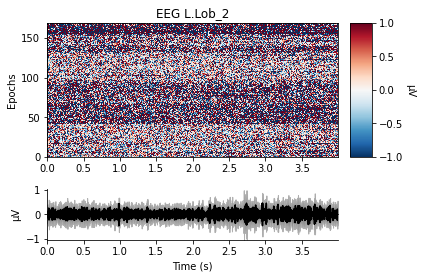

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


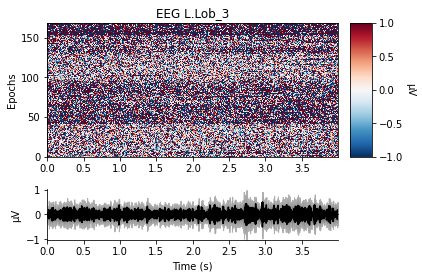

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


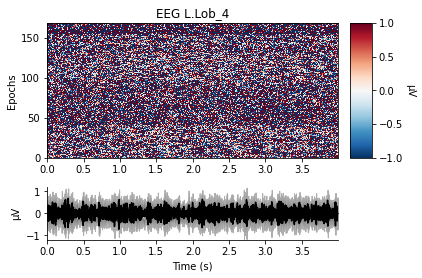

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


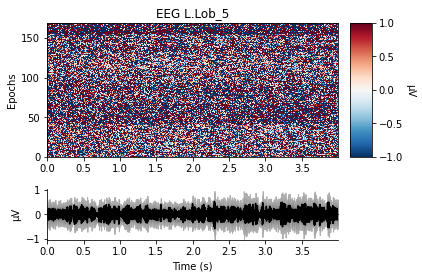

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


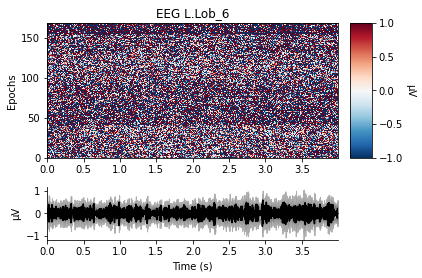

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


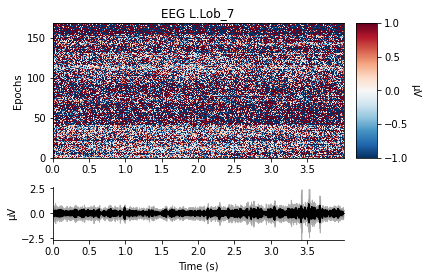

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


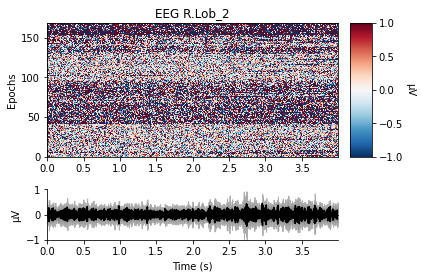

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


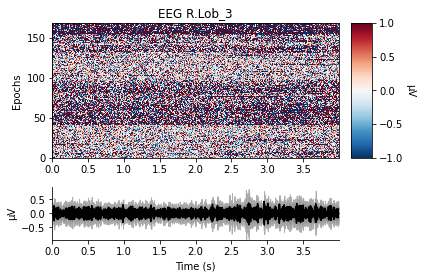

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


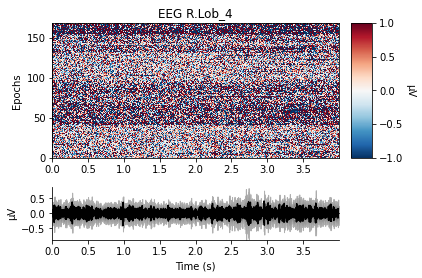

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


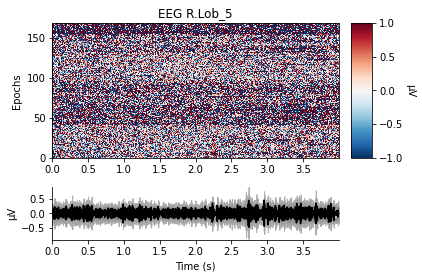

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


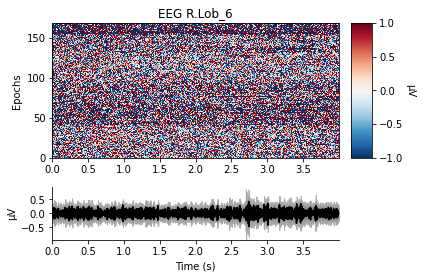

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-39-374c19d62630>:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)


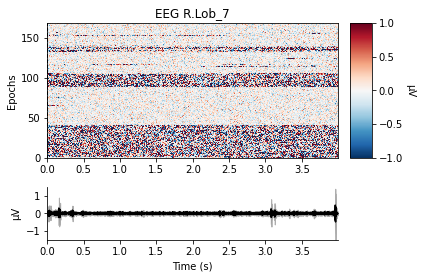

In [ ]:
vmax=1
vmin=-1*vmax
for i in range(12):
  eeg_filtered.plot_image(i, vmin=vmin, vmax=vmax)

In [ ]:
import math
from mne.time_frequency import tfr_morlet, tfr_multitaper

In [ ]:
freqs=np.linspace(5,170)
n_cycles=freqs/2

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   31.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   31.7s finished


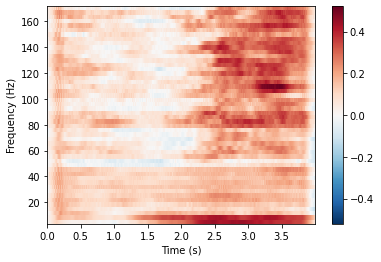

[<Figure size 432x288 with 2 Axes>]

In [ ]:
power_0, itc_0 = tfr_multitaper(epochs_eeg, freqs, n_cycles=n_cycles,return_itc=True, n_jobs=-1,)
power_0.plot([0], mode='logratio', baseline=(-0.2,0.0))

No baseline correction applied


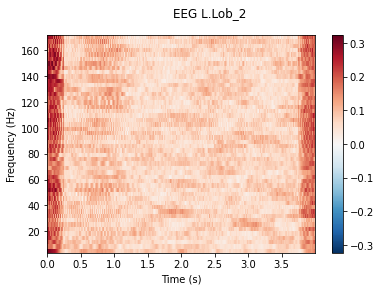

Applying baseline correction (mode: logratio)


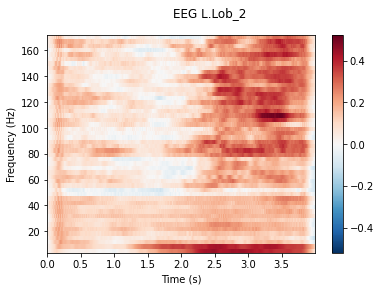

No baseline correction applied


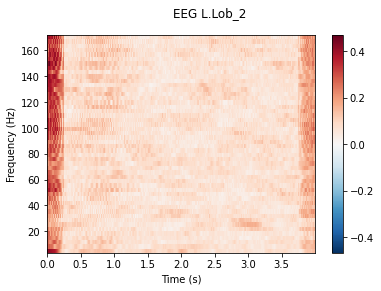

Applying baseline correction (mode: logratio)


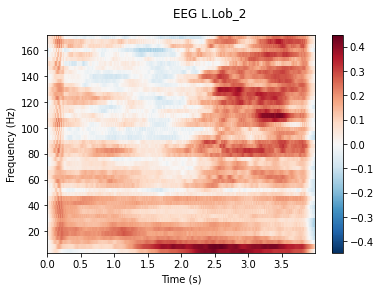

No baseline correction applied


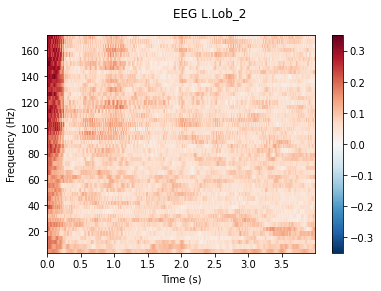

Applying baseline correction (mode: logratio)


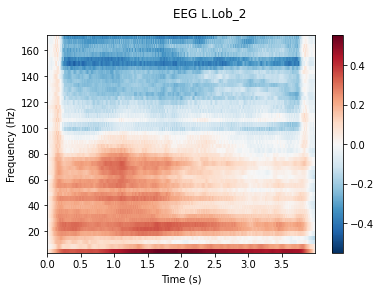

No baseline correction applied


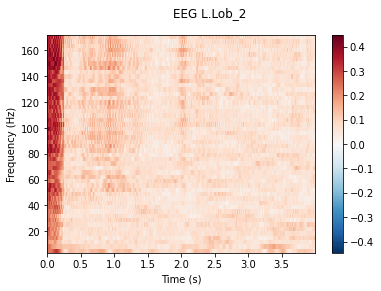

Applying baseline correction (mode: logratio)


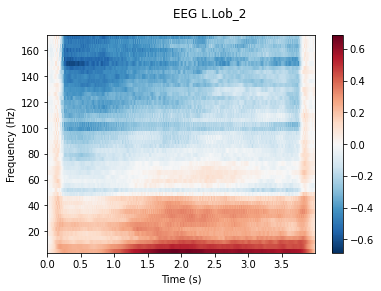

No baseline correction applied


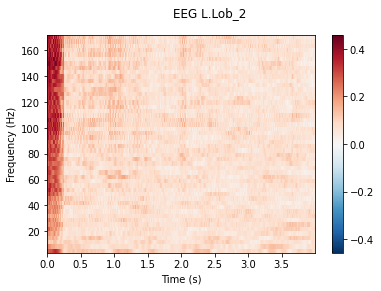

Applying baseline correction (mode: logratio)


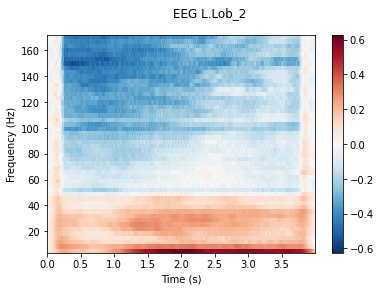

No baseline correction applied


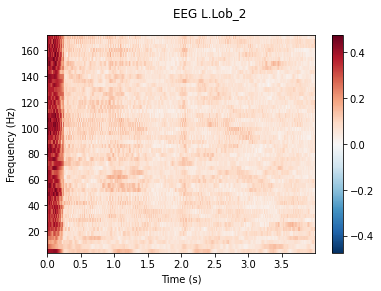

Applying baseline correction (mode: logratio)


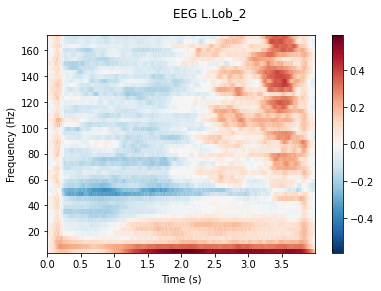

No baseline correction applied


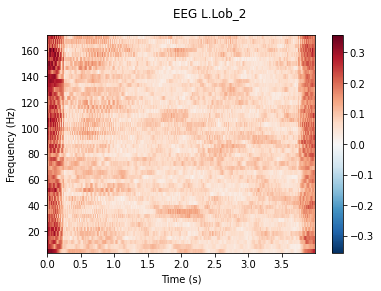

Applying baseline correction (mode: logratio)


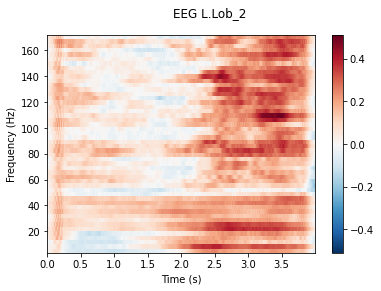

No baseline correction applied


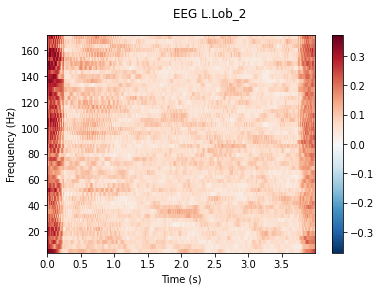

Applying baseline correction (mode: logratio)


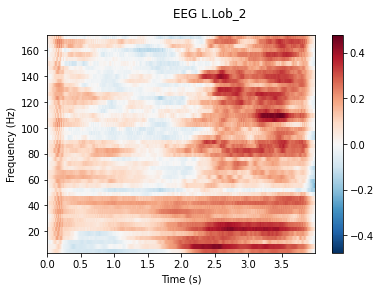

No baseline correction applied


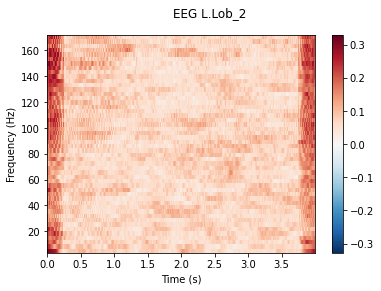

Applying baseline correction (mode: logratio)


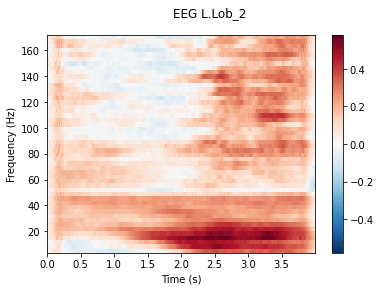

No baseline correction applied


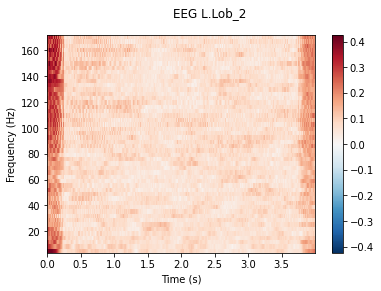

Applying baseline correction (mode: logratio)


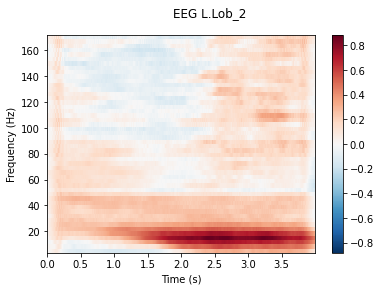

No baseline correction applied


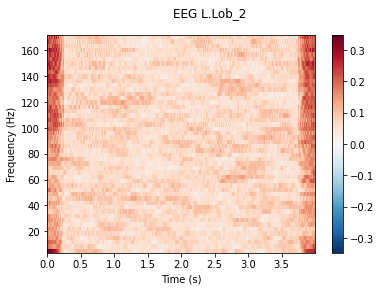

Applying baseline correction (mode: logratio)


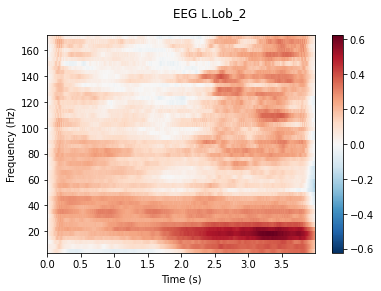

No baseline correction applied


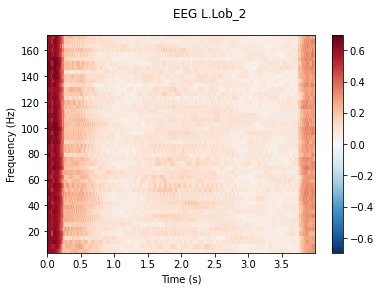

Applying baseline correction (mode: logratio)


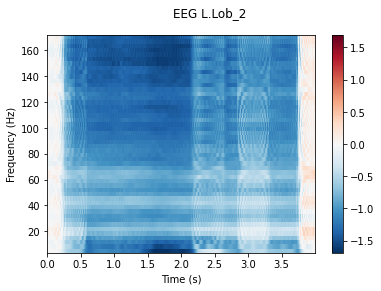

In [ ]:
for i in range(12):
  itc_0.plot([i], title=itc_0.ch_names[0])
  power_0.plot([i], mode='logratio', baseline=(-0.2,0.0), title=itc_0.ch_names[0])

In [ ]:
power_0.plot([i], mode='logratio', baseline=(-0.2,0.0), title=[])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.1s remaining:    0.0s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.8min finished


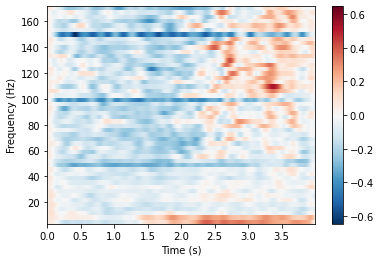

[<Figure size 432x288 with 2 Axes>]

In [ ]:
power_0 = tfr_morlet(epochs_eeg, freqs, n_cycles=n_cycles,return_itc=False, n_jobs=-1,)
power_0.plot([0], mode='logratio', baseline=(-0.2,0.0))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.2min finished


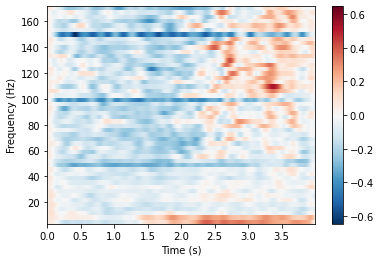

[<Figure size 432x288 with 2 Axes>]

In [ ]:
power_0,itc_0 = tfr_morlet(epochs_eeg, freqs, n_cycles=n_cycles,return_itc=True, n_jobs=-1,)


Applying baseline correction (mode: logratio)


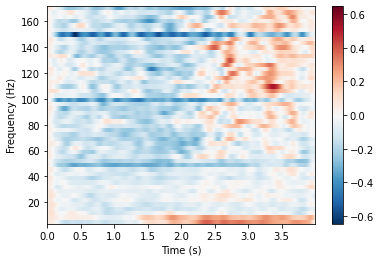

Applying baseline correction (mode: logratio)


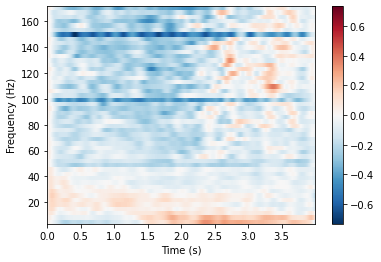

Applying baseline correction (mode: logratio)


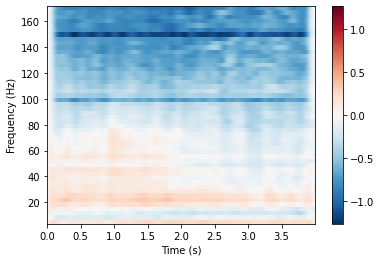

Applying baseline correction (mode: logratio)


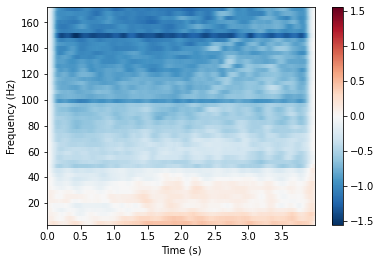

Applying baseline correction (mode: logratio)


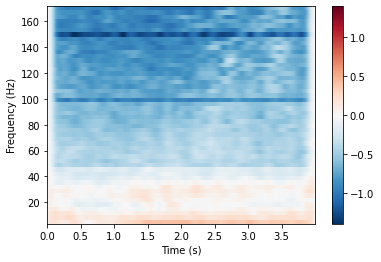

Applying baseline correction (mode: logratio)


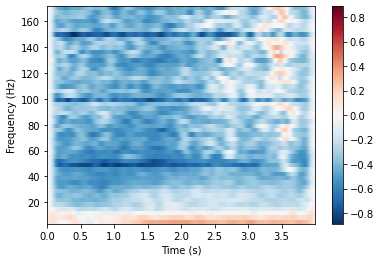

Applying baseline correction (mode: logratio)


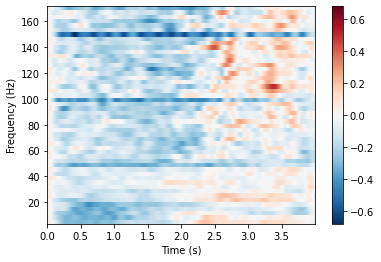

Applying baseline correction (mode: logratio)


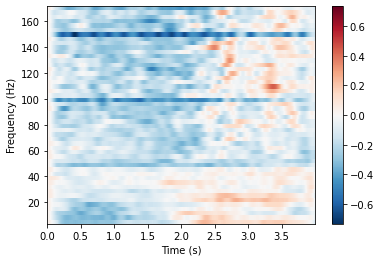

Applying baseline correction (mode: logratio)


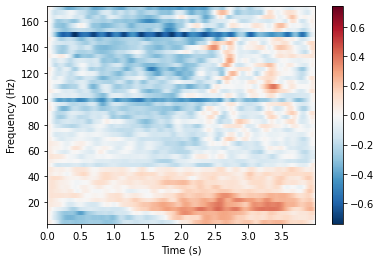

Applying baseline correction (mode: logratio)


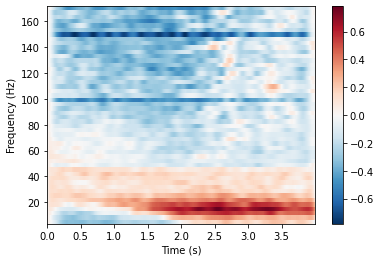

Applying baseline correction (mode: logratio)


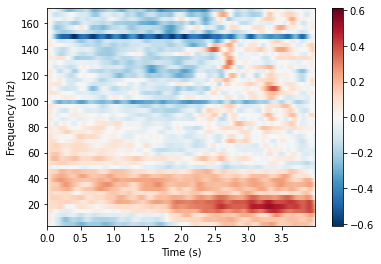

Applying baseline correction (mode: logratio)


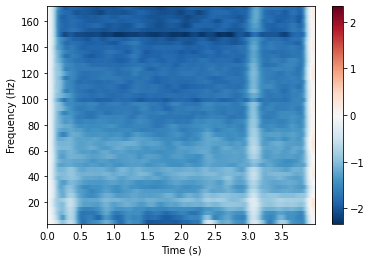

In [ ]:
for i in range(12):
  #itc_0.plot([i])
  power_0.plot([i], mode='logratio', baseline=(-0.2,0.0), title=[])

No baseline correction applied


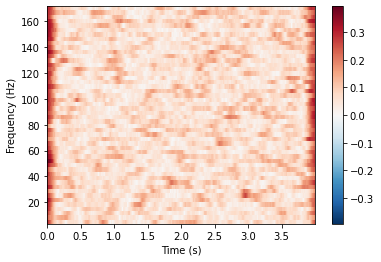

No baseline correction applied


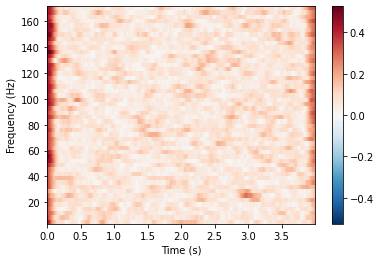

No baseline correction applied


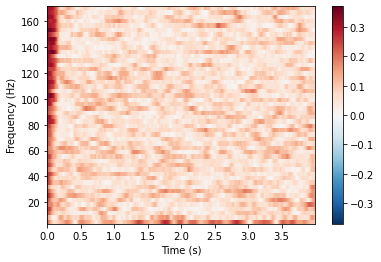

No baseline correction applied


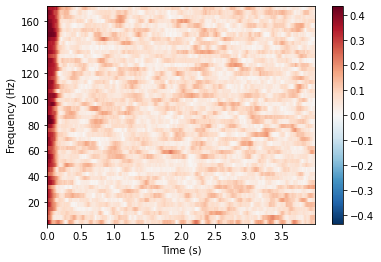

No baseline correction applied


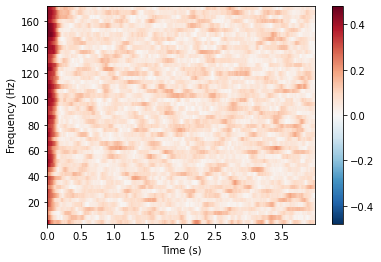

No baseline correction applied


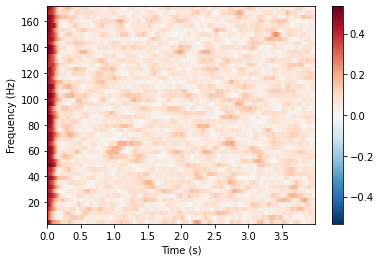

No baseline correction applied


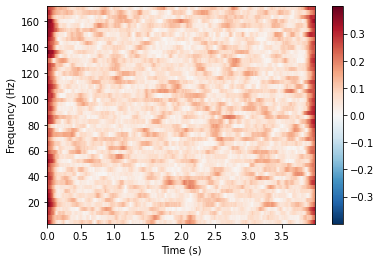

No baseline correction applied


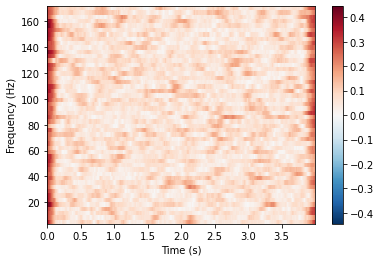

No baseline correction applied


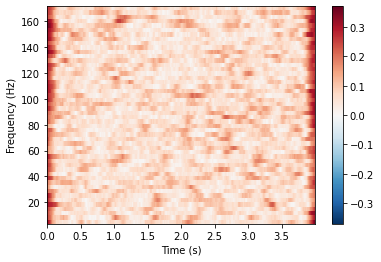

No baseline correction applied


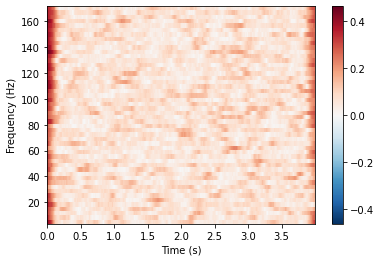

No baseline correction applied


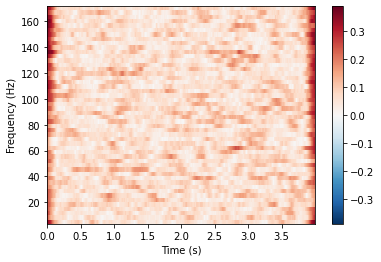

No baseline correction applied


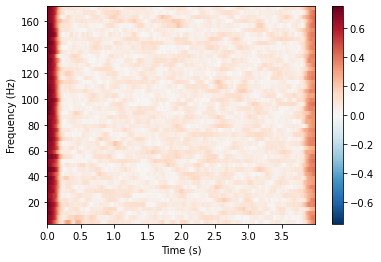

In [ ]:
for i in range(12):
  itc_0.plot([i])

In [ ]:
epochs_eeg_try=epochs_eeg.copy().drop_channels(epochs_eeg.ch_names[1:])
epochs_eeg_init_try=epochs_eeg_init.copy().drop_channels(epochs_eeg_init.ch_names[1:])

In [ ]:
power_0 = tfr_morlet(epochs_eeg_try, freqs, n_cycles=n_cycles,return_itc=False, n_jobs=-1, average=False)
#power_0.plot([0], mode='logratio', baseline=(-0.2,0.0))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Not setting metadata


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.9s finished


0
Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated


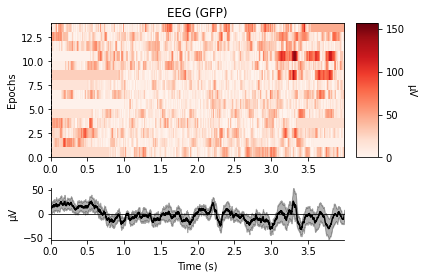

Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated


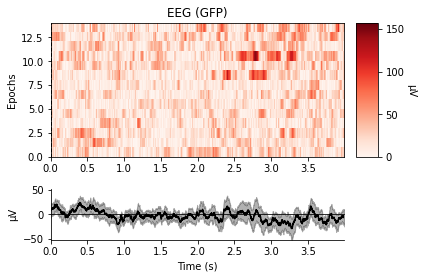


1
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated


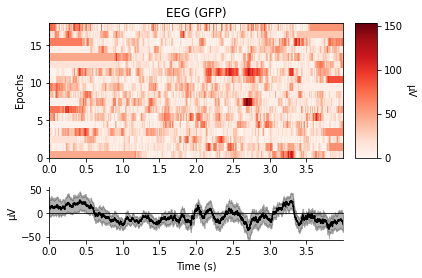

Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated


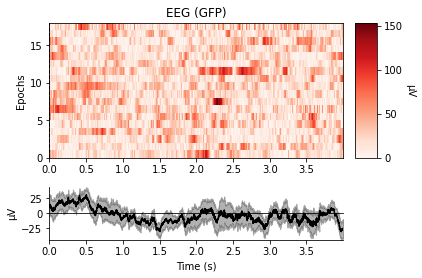


2
Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated


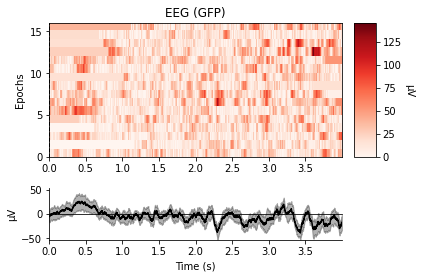

Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated


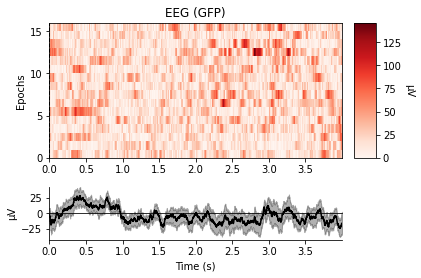


3
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated


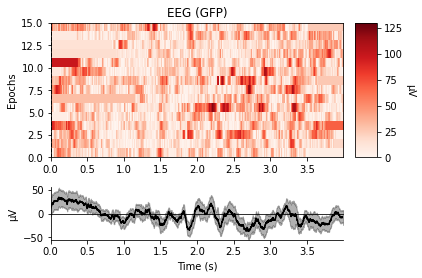

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated


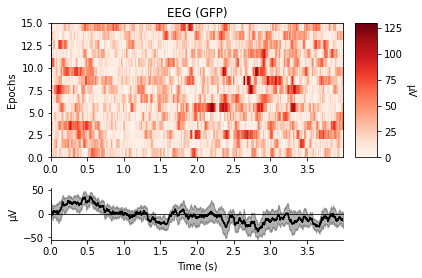


4
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated


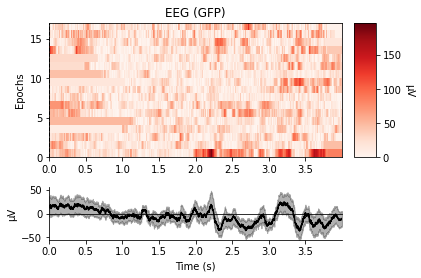

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated


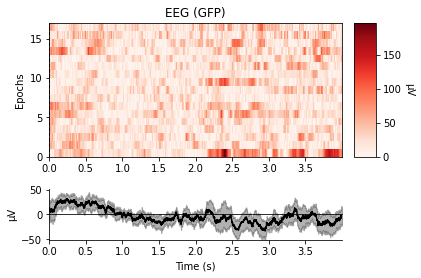


5
Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated


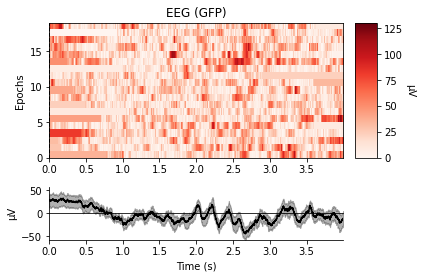

Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated


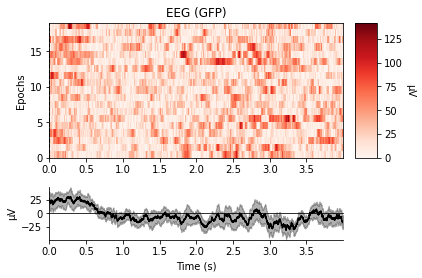


6
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated


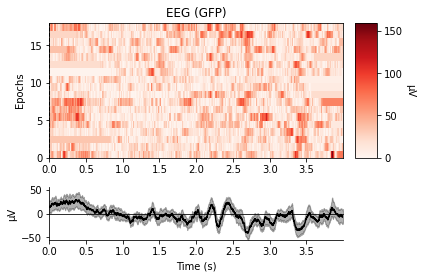

Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated


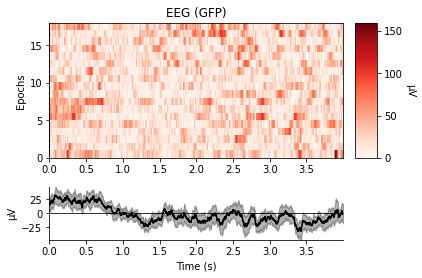


7
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated


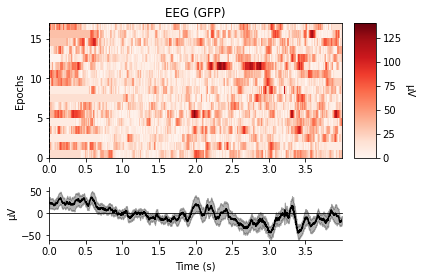

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated


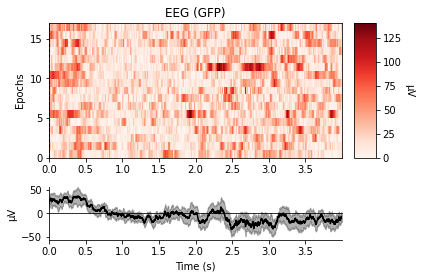


8
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated


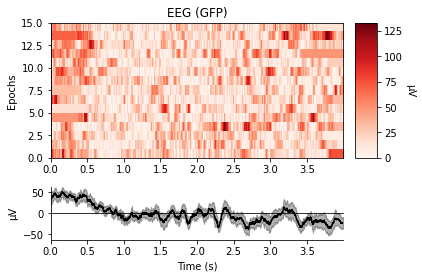

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated


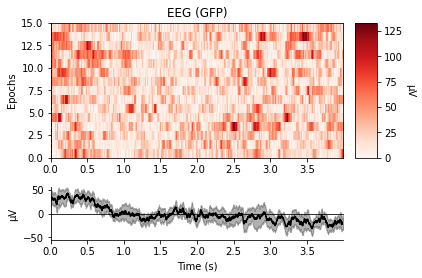


9
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated


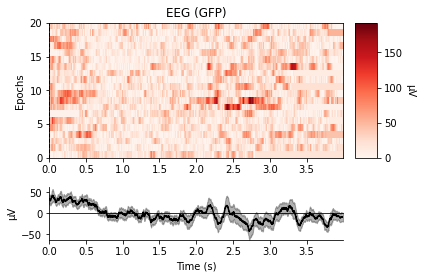

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated


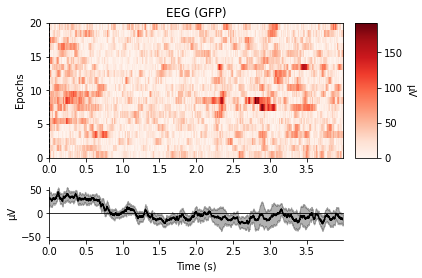

In [ ]:
for i in range(10):

  tempind=np.where(digits_trials==i)[0]
  print(i)

  epochs_eeg_try[tempind].plot_image()
  epochs_eeg_init_try[tempind].plot_image()
  #power_0[tempind].average().plot([0], mode='logratio', baseline=(-0.2,0.0))

  print()

In [ ]:
power_0[10,12,120]

<EpochsTFR | time : [0.000000, 3.999000], freq : [5.000000, 170.000000], epochs : 3, channels : 1, ~4.6 MB>

In [ ]:
power_0._data.shape

(169, 1, 50, 4000)

In [ ]:
data_to_anal=power_0._data.squeeze()

In [ ]:
inds=np.where(freqs>70)[0]

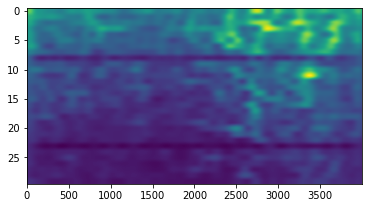

In [ ]:
data_to_anal_av=np.average(data_to_anal,0)[inds,:]
plt.imshow(data_to_anal_av, aspect=70)

In [ ]:

epochs_data=epochs_eeg._data
hands_data=epochs_handwriting._data[:,:,:1000]


print('epochs_data', epochs_data.shape)
print('hands_data', hands_data.shape)


epochs_data (169, 12, 4000)
hands_data (169, 2, 1000)


In [ ]:
'''Нормализую данные рукописного ввода'''
m = nn.BatchNorm1d(2, affine=False)
input = np.transpose(hands_data, [0,1,2])
output = m(torch.Tensor(input))

#пот батч норм сначала количество сэмлов, потом количество каналов, потом количество временных рядов
hands_data=output

In [ ]:
'''Нормализую данные нейроактивности'''
m = nn.BatchNorm1d(12, affine=False)
input = np.transpose(epochs_data, [0,1,2])
output = m(torch.Tensor(input))

epochs_data=output

#пот батч норм сначала количество сэмлов, потом количество каналов, потом количество временных рядов

In [ ]:
sh=hands_data.shape


In [ ]:
'''Делю на тренировку и обучение'''

x_train=epochs_data[:140,:,::2]
x_test=epochs_data[140:,:,::2]

train_data=epochs_data[:140,:,::2]
test_data=epochs_data[140:,:,::2]


#x_train=hands_data[:140]
#x_test=hands_data[140:]

#train_data=hands_data[:140]
#test_data=hands_data[140:]


y_train=torch.Tensor(digits_trials[:140])
y_test=torch.Tensor(digits_trials[140:])


print(' Train epochs_data', x_train.shape)
print(' Train hands_data', x_test.shape)
print(' Test epochs_data', y_train.shape)
print(' Test hands_data', y_test.shape)


 Train epochs_data torch.Size([140, 12, 2000])
 Train hands_data torch.Size([29, 12, 2000])
 Test epochs_data torch.Size([140])
 Test hands_data torch.Size([29])


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import scipy.io
from scipy.special import softmax


In [ ]:
new_fs=500


In [ ]:
from torch.nn.modules.activation import ReLU
class RNNModel(nn.Module):
  def __init__(self, d_, check_dim=0):
    super().__init__()

    self.check_dim=check_dim

    self.d_=d_



    self.bn_1=nn.BatchNorm1d(d_['ch_num'])

    self.rnn_1=nn.LSTM( batch_first=True,
                        input_size=d_['in_1'],
                       num_layers=d_['layers_1'],
                       hidden_size=d_['hidden_1'])

    self.fc2 = nn.Sigmoid()



    self.rnn_2=nn.LSTM( batch_first=True,
                        input_size=d_['in_2'],
                       num_layers=d_['layers_2'],
                       hidden_size=d_['hidden_2'])




    self.bn_2=nn.BatchNorm1d(d_['layers_1'])
    self.af=ReLU()




    #self.rnn_3=nn.LSTM( batch_first=True,
    #                    input_size=d_['in_3'],
    #                   num_layers=d_['layers_3'],
    #                   hidden_size=d_['hidden_3'])

    #self.rnn_4=nn.LSTM( batch_first=True,
    #                    input_size=d_['in_4'],
    #                   num_layers=d_['layers_4'],
    #                   hidden_size=d_['hidden_4'])


    self.do1=nn.Dropout(p=0.3)
    self.do2=nn.Dropout(p=0.3)


    self.conv1 = nn.Conv1d(in_channels=d_['in_1_1'],
                           out_channels=d_['out_1_1'],
                           kernel_size=d_['kernel_1'],
                           stride=d_['stride_1'])

    self.lin=nn.Linear(d_['final_in'],d_['final_out'],)



  def forward(self, x):


        h0 = torch.zeros(self.d_['layers_1'], x.size(0), self.d_['hidden_1']).requires_grad_()
        c0 = torch.zeros(self.d_['layers_1'], x.size(0), self.d_['hidden_1'],).requires_grad_()

        print('h0 ',h0.shape) if self.check_dim==1 else 1
        print('c0 ',c0.shape) if self.check_dim==1 else 1
        print('x ',x.shape) if self.check_dim==1 else 1


        out, (hn, cn) = self.rnn_1(x, (h0.detach(), c0.detach()))

        print('out ',out.shape) if self.check_dim==1 else 1

        #out=out.permute(0,1,2)
        out=self.fc2(out)



        h0_2 = torch.zeros(self.d_['layers_2'], out.size(0), self.d_['hidden_2'],).requires_grad_()
        c0_2 = torch.zeros(self.d_['layers_2'], out.size(0), self.d_['hidden_2'],).requires_grad_()
        out, (hn_2, cn_2) = self.rnn_2(out, (h0_2.detach(), c0_2.detach()))

        print('h0_2 ',h0_2.shape) if self.check_dim==1 else 1
        print('c0_2 ',c0_2.shape) if self.check_dim==1 else 1
        print('out ',out.shape) if self.check_dim==1 else 1

        #print(out.shape)
        out=out.permute(0,2,1)

        #out=self.conv1(self.do1(out))

        #print('conv1 ',out.shape) if self.check_dim==1 else 1

        out=self.lin(self.do2(out))

        out=out.reshape(out.shape[0],out.shape[1]*out.shape[2])

        print('lin ',out.shape) if self.check_dim==1 else 1



        return out

In [ ]:
#test__=torch.Tensor(test__)

d={

  'ch_num':12,
  'in_1':12,
  'layers_1':2,
  'hidden_1':50,

  'in_2':50,
  'layers_2':2,
  'hidden_2':1,

  'in_3':200,
  'layers_3':2,
  'hidden_3':475,

  'in_4':200,
  'layers_4':2,
  'hidden_4':475,


   'in_1_1':1,
   'out_1_1':1,
   'kernel_1':200,
  'stride_1':20,

   'final_in':2000,
   'final_out':10

}


In [ ]:
test__=torch.rand(train_data.shape[0],train_data.shape[2] ,train_data.shape[1])
test__.shape

torch.Size([140, 2000, 12])

In [ ]:
cnn_=RNNModel(d,0)
out=cnn_(test__)

In [ ]:
out.shape

torch.Size([140, 10])

In [ ]:
print(cnn_)

RNNModel(
  (bn_1): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (rnn_1): LSTM(12, 50, num_layers=2, batch_first=True)
  (fc2): Sigmoid()
  (rnn_2): LSTM(50, 1, num_layers=2, batch_first=True)
  (bn_2): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (af): ReLU()
  (do1): Dropout(p=0.3, inplace=False)
  (do2): Dropout(p=0.3, inplace=False)
  (conv1): Conv1d(1, 1, kernel_size=(200,), stride=(20,))
  (lin): Linear(in_features=2000, out_features=10, bias=True)
)


In [ ]:
y_test.shape

torch.Size([29])

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
''' Создаю нужный лоадеры'''

from torch.utils.data import TensorDataset, DataLoader


train_dataset=TensorDataset(torch.Tensor(x_train.permute(0,2,1)), torch.Tensor(y_train)  )
train_loader=DataLoader(train_dataset, batch_size=20,shuffle=True)

test_dataset=TensorDataset(torch.Tensor(x_test.permute(0,2,1)), torch.Tensor(y_test)  )
test_loader=DataLoader(test_dataset, batch_size=33,shuffle=False)


In [ ]:

x_temp, y_temp = next(iter(train_loader))

In [ ]:
x_temp, y_temp = next(iter(train_loader))

In [ ]:
from torch.nn.functional import one_hot #TORCH.NN.FUNCTIONAL.ONE_HOT


In [ ]:
optimizer=torch.optim.Adam(cnn_.parameters(), lr=1e-4, weight_decay=1e-2)
loss_history = []
loss=torch.nn.CrossEntropyLoss()

In [ ]:
from sklearn.metrics import accuracy_score, r2_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def return_r2(y_batch, pred):
  sh=y_batch.to(float).shape

  #print(sh)

  x_=np.transpose( y_batch.to(float) , (1,0,2), ).reshape(sh[1], sh[0]*sh[2])[0]
  y_=np.transpose( y_batch.to(float) , (1,0,2), ).reshape(sh[1], sh[0]*sh[2])[1]


  x_pr_=np.transpose( pred.to(float).detach().numpy() , (1,0,2), ).reshape(sh[1], sh[0]*sh[2])[0]
  y_pr_=np.transpose( pred.to(float).detach().numpy() , (1,0,2), ).reshape(sh[1], sh[0]*sh[2])[1]

  x_r_=r2_score(x_,x_pr_)
  y_r_=r2_score(y_,y_pr_)

  print('Acc ',x_r_, y_r_)

In [ ]:

loss_history = []
n_epoches = 1000
val_loss_history = []

for epoch in range(n_epoches):
    loss_epoch = 0

    ''' Обучаю по батчам, сравниваю выход'''
    for X_batch, y_batch in train_loader:

        pred = cnn_(X_batch)
        loss_value = loss(pred.to(float), y_batch.to(dtype=torch.long))
        loss_epoch += loss_value.item()

        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

    loss_epoch /= len(X_batch)
    loss_history.append(loss_epoch)

    ''' Вывожу значения тренировки'''
    if epoch % 10 == 0:
        #print(f'MSE Loss after {epoch} epoch = {loss_history[-1]}; val loss= {val_loss_history[-1]}')
        print('Значение на тренировке')
        #return_r2(y_batch.to(float) , pred.to(float))
        print(accuracy_score (y_batch.detach().numpy(), np.argmax(pred.detach().numpy(),axis=1) ))

        print()


    ''' Вывожу значения теста'''
    for X_batch, y_batch in test_loader:

        pred = cnn_(X_batch)
        loss_value = loss(pred.to(float), y_batch.to(dtype=torch.long))
        loss_epoch += loss_value.item()

    loss_epoch /= len(X_batch)
    val_loss_history.append(loss_epoch)

    #real_=np.argmax(y_batch,1)
    #pred_=np.argmax(pred.tolist(),1)
    #val_ac_=np.correlate(real_,pred_)


    if epoch % 10 == 0:
        print(f'MSE Loss after {epoch} epoch = {loss_history[-1]}; val loss= {val_loss_history[-1]}')
        print()
        print('Значение на валидации')
        #return_r2(y_batch.to(float) , pred.to(float))
        #print(f'Accuracy after {epoch} epoch = {ac_}; Accuracy loss= {val_ac_}')
        print(accuracy_score (y_batch.detach().numpy(), np.argmax(pred.detach().numpy(),axis=1) ))
        #print(f'VAL MSE Loss after {epoch} epoch = {loss_history[-1]}')


Значение на тренировке
0.1

MSE Loss after 0 epoch = 0.8085977714394816; val loss= 0.1074409169261309

Значение на валидации
0.13793103448275862
Значение на тренировке
0.15

MSE Loss after 10 epoch = 0.8090390787168719; val loss= 0.10710312845170986

Значение на валидации
0.1724137931034483
Значение на тренировке
0.05

MSE Loss after 20 epoch = 0.8044181392810842; val loss= 0.10751649668663278

Значение на валидации
0.034482758620689655
Значение на тренировке
0.05

MSE Loss after 30 epoch = 0.8041028349010875; val loss= 0.10749999561769845

Значение на валидации
0.06896551724137931
Значение на тренировке
0.2

MSE Loss after 40 epoch = 0.8048335637209778; val loss= 0.10687725039390233

Значение на валидации
0.10344827586206896
Значение на тренировке
0.15

MSE Loss after 50 epoch = 0.8074936790132272; val loss= 0.10716071824009568

Значение на валидации
0.13793103448275862
Значение на тренировке
0.1

MSE Loss after 60 epoch = 0.8047924929424957; val loss= 0.10675580788354808

Значение на

In [ ]:
pred.shape

torch.Size([20, 10])

In [ ]:
kkk=22
for kkk in range(33):
  plt.scatter(y_batch[kkk][0]  , y_batch[kkk][1] *-1 )
  plt.show()

  plt.scatter(pred.detach()[kkk][0]  , pred.detach()[kkk][1] *-1 , color='r' )
  plt.show()

  plt.plot(y_batch[kkk][0])
  plt.show()

  plt.plot(pred.detach()[kkk][0])
  plt.show()




IndexError: ignored

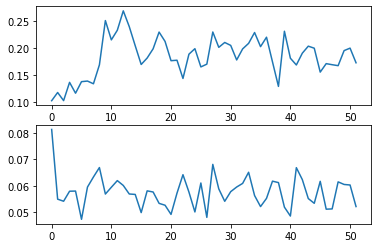

In [ ]:
k=0
fig,ax=plt.subplots(2,1)
ax[0].plot(loss_history[k:])
ax[1].plot(val_loss_history[k:])

In [ ]:
nput = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
output = loss(input, target)

In [ ]:
target

tensor([[0.4744, 0.3819, 0.0600, 0.0141, 0.0696],
        [0.0693, 0.2100, 0.4076, 0.0366, 0.2765],
        [0.1302, 0.0353, 0.2227, 0.0873, 0.5244]])

In [ ]:
nput

tensor([[-0.5609, -0.3142,  3.0360, -0.7950,  0.5580],
        [ 0.0848, -1.5581,  0.0682,  0.2365, -3.0887],
        [-0.0537,  0.6098, -0.9273, -0.8383, -0.1137]], requires_grad=True)